<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/backtestBacktrading/blob/main/Bitcoinbacktrader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#instala biblioteca yahoo_fin
!pip install yahoo_fin

     |████████████████████████████████| 81 kB 3.6 MB/s 
     |████████████████████████████████| 83 kB 2.5 MB/s 
     |████████████████████████████████| 103 kB 42.8 MB/s 
     |████████████████████████████████| 127 kB 44.9 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=0dee712325186254738c149205436f7ddd61ab9e124a47a91e310f5e0d706b1b
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=d280119615a4de22c7ae896524be854754a36faaeaf747db18d0d1ea6402e225
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=440153ec401c28e4bdcd2daf3620fd50b6f4fed819601fb1764ac4ef61e1faa6
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [2]:
#instala biblioteca yfinance
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3 MB 5.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=1b4535391fa649c764a2427505cf0f0882bf031229346351bdb9e3367995a87a
  Stored in directory: /tmp/pip-ephem-wheel-cache-cv2kscv6/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#instala request
!pip install requests_html

In [4]:
# Instalar Backtrader
!pip install backtrader

     |████████████████████████████████| 410 kB 4.3 MB/s 


In [5]:
# Obtenha os pacotes necessários

from datetime import datetime
import backtrader as bt
from IPython.display import display, Image
import yfinance as yf

In [6]:
#Definição de classe de estratégia cruzada de média móvel simples (SMA)

class SmaCross(bt.Strategy):
    # lista de parâmetros configuráveis para a estratégia
    params = dict(
        pfast=10,  # período para a média móvel rápida
        pslow=30   # período para a média móvel lenta
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # média móvel rápida
        sma2 = bt.ind.SMA(period=self.p.pslow)  # média móvel lenta
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal(sinal de cruzamento)

    def next(self):
        if not self.position:  # not in the market(não no mercado)
            if self.crossover > 0:  # if fast crosses slow to the upside(se o cruzamento rápido for lento para cima)
                self.buy()  # enter long(entrar por muito tempo)

        elif self.crossover < 0:  # in the market & cross to the downside(no mercado e cruze para o lado negativo)
            self.close()  # close long position(fechar posição longa)

In [7]:
# Definição de classe de estratégia de índice de força relativa (RSI)

class RSI(bt.Strategy):

    def __init__(self):
        self.rsi = bt.indicators.RSI(self.data.close)

    def next(self):
        if not self.position: #Se você ainda não comprou o estoque
            if self.rsi < 30:
                self.order = self.buy()

        elif self.rsi > 70:
            self.order = self.sell()

In [8]:
from yahoo_fin.stock_info import get_data
bitcoin_weekly= get_data("BTC-USD", start_date="12/04/2018", end_date="03/11/2021", index_as_date = True, interval="1wk")
bitcoin_weekly

,open,high,low,close,adjclose,volume,ticker
2018-12-03,3886.294922,4075.627686,3280.228760,3614.234375,3614.234375,33296896714,BTC-USD
2018-12-10,3612.046387,3647.332520,3191.303467,3252.839111,3252.839111,29869247431,BTC-USD
2018-12-17,3253.123047,4198.429688,3253.123047,3998.980225,3998.980225,46021506218,BTC-USD
2018-12-24,4000.331787,4271.792480,3642.632080,3865.952637,3865.952637,39249734918,BTC-USD
2018-12-31,3866.839111,4093.297363,3707.231201,4076.632568,4076.632568,34343716582,BTC-USD
...,...,...,...,...,...,...,...
2021-02-08,38886.828125,49487.640625,38076.324219,48717.289062,48717.289062,580021243858,BTC-USD
2021-02-15,48696.535156,58330.570312,46347.476562,57539.945312,57539.945312,470533297170,BTC-USD
2021-02-22,57532.738281,57533.390625,43241.617188,45137.769531,45137.769531,766679775805,BTC-USD
2021-03-01,45159.503906,52535.136719,45115.093750,51206.691406,51206.691406,333113779409,BTC-USD


In [9]:
bitcoin_weekly.to_csv('/content/bitcoin.csv')

In [11]:
# Configurações do Cerebro (Mecanismo do Backtrader)

# importar para o cerebro
cerebro = bt.Cerebro()

# Importar dados financeiros do Yahoo


data = bt.feeds.YahooFinanceData(dataname= 'bitcoin.csv') # data final

# Adicionar dados
cerebro.adddata(data)

# Adicionar estratégia

#cerebro.addstrategy(SmaCross) 
cerebro.addstrategy(RSI) 

# Configurações do corretor
cerebro.broker.setcash(10000000)

# Configurando unidades comerciais
cerebro.addsizer(bt.sizers.SizerFix, stake=30) #30 semanas de cada vez

quantidade final :  10000000.0 1
produção :  0.0 %


<IPython.core.display.Javascript object>

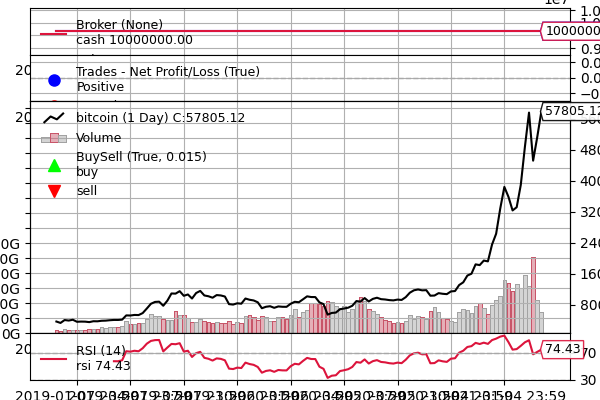

In [12]:
#  compilando com Cerebro

# Obtenha seu investimento inicial
init_cash = cerebro.broker.getvalue()

# compilando com Cerebro
cerebro.run()

# Obtenha o valor final
final_cash = cerebro.broker.getvalue()

print("quantidade final : ", final_cash, "1")
print("produção : ", float(final_cash - init_cash)/float(init_cash) * 100., "%")

# imprima o gráfico
cerebro.plot()[0][0].savefig('plot.png', dpi=100)
display(Image(filename='plot.png'))